## Dataset Preprocessing for Exercise 2

### Setup and Imports

In [57]:
%pip install -q ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import pandas as pd
import numpy as np
from scipy.io import arff
import requests
import io
from ucimlrepo import fetch_ucirepo

#from nn.nn import NN
#from nn.layer import Layer
#from nn.functions import *

## Polish Bankruptcy Dataset

In [59]:
data = fetch_ucirepo(id=365)

bancrupcy_df = data.data.original

print(bancrupcy_df.shape)
print(bancrupcy_df.columns)
print(bancrupcy_df.head())

(43405, 66)
Index(['year', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30',
       'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40',
       'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50',
       'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60',
       'A61', 'A62', 'A63', 'A64', 'class'],
      dtype='object')
   year        A1       A2       A3      A4       A5       A6        A7  \
0     1  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760   
1     1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340   
2     1  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060   
3     1  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704   
4     1  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320   

        A

In [60]:
column_names = {
    "A1": "net_profit_total_assets",
    "A2": "total_liabilities_total_assets",
    "A3": "working_capital_total_assets",
    "A4": "current_assets_short_term_liabilities",
    "A5": "cash_securities_receivables_short_term_liabilities_ratio",
    "A6": "retained_earnings_total_assets",
    "A7": "EBIT_total_assets",
    "A8": "book_value_equity_total_liabilities",
    "A9": "sales_total_assets",
    "A10": "equity_total_assets",
    "A11": "gross_profit_financial_expenses_total_assets",
    "A12": "gross_profit_short_term_liabilities",
    "A13": "gross_profit_depreciation_sales",
    "A14": "gross_profit_interest_total_assets",
    "A15": "total_liabilities_gross_profit_depreciation_ratio",
    "A16": "gross_profit_depreciation_total_liabilities",
    "A17": "total_assets_total_liabilities",
    "A18": "gross_profit_total_assets",
    "A19": "gross_profit_sales",
    "A20": "inventory_sales_ratio",
    "A21": "sales_n_sales_n_minus_1",
    "A22": "profit_operating_activities_total_assets",
    "A23": "net_profit_sales",
    "A24": "gross_profit_3_years_total_assets",
    "A25": "equity_share_capital_total_assets",
    "A26": "net_profit_depreciation_total_liabilities",
    "A27": "profit_operating_activities_financial_expenses",
    "A28": "working_capital_fixed_assets",
    "A29": "logarithm_total_assets",
    "A30": "total_liabilities_cash_sales_ratio",
    "A31": "gross_profit_interest_sales",
    "A32": "current_liabilities_cost_products_sold_ratio",
    "A33": "operating_expenses_short_term_liabilities",
    "A34": "operating_expenses_total_liabilities",
    "A35": "profit_sales_total_assets",
    "A36": "total_sales_total_assets",
    "A37": "current_assets_inventories_long_term_liabilities",
    "A38": "constant_capital_total_assets",
    "A39": "profit_sales_sales_ratio",
    "A40": "current_assets_inventory_receivables_short_term_liabilities",
    "A41": "total_liabilities_operating_profit_depreciation_ratio",
    "A42": "profit_operating_activities_sales",
    "A43": "rotation_receivables_inventory_turnover_days",
    "A44": "receivables_sales_ratio",
    "A45": "net_profit_inventory",
    "A46": "current_assets_inventory_short_term_liabilities",
    "A47": "inventory_cost_products_sold_ratio",
    "A48": "EBITDA_total_assets",
    "A49": "EBITDA_sales",
    "A50": "current_assets_total_liabilities",
    "A51": "short_term_liabilities_total_assets",
    "A52": "short_term_liabilities_cost_products_sold_ratio",
    "A53": "equity_fixed_assets",
    "A54": "constant_capital_fixed_assets",
    "A55": "working_capital",
    "A56": "sales_cost_products_sold_sales_ratio",
    "A57": "current_assets_inventory_short_term_liabilities_sales_gross_profit_depreciation_ratio",
    "A58": "total_costs_total_sales",
    "A59": "long_term_liabilities_equity",
    "A60": "sales_inventory",
    "A61": "sales_receivables",
    "A62": "short_term_liabilities_sales_ratio",
    "A63": "sales_short_term_liabilities",
    "A64": "sales_fixed_assets"
}

bancrupcy_df.rename(columns=column_names, inplace=True)
bancrupcy_df.head()


,year,net_profit_total_assets,total_liabilities_total_assets,working_capital_total_assets,current_assets_short_term_liabilities,cash_securities_receivables_short_term_liabilities_ratio,retained_earnings_total_assets,EBIT_total_assets,book_value_equity_total_liabilities,sales_total_assets,...,sales_cost_products_sold_sales_ratio,current_assets_inventory_short_term_liabilities_sales_gross_profit_depreciation_ratio,total_costs_total_sales,long_term_liabilities_equity,sales_inventory,sales_receivables,short_term_liabilities_sales_ratio,sales_short_term_liabilities,sales_fixed_assets,class
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [61]:
# ------------------------------------------------------
# Dataset preparation — starting after the original loading
# ------------------------------------------------------

# Make a copy to avoid touching the original loaded dataset
bankruptcy_df_base = bancrupcy_df.copy()

# Separate features and target
X = bankruptcy_df_base.drop(columns=['class', 'year'])  # Drop 'class' and 'Year' for now
y = bankruptcy_df_base['class']

#### Insert further preprocessing and save final dataset as "Data/polish_bankruptcy.csv" (also on Github)

## Congressional Voting Dataset

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import missingno as msno
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge

In [63]:
training_set = pd.read_csv("data/CongressionalVotingID.shuf.lrn.csv")
training_set.head()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,362,democrat,y,n,y,n,y,y,y,n,y,y,n,n,y,y,n,unknown
1,86,democrat,n,n,y,n,y,y,n,n,n,y,y,y,y,y,n,y
2,264,democrat,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,unknown
3,258,republican,n,n,n,y,y,n,n,n,n,n,n,y,n,y,unknown,y
4,381,democrat,y,y,y,n,n,y,unknown,y,y,n,y,n,y,n,y,y


In [64]:
training_set = training_set.drop(['ID'], axis=1)
training_set.replace({'y': 1, 'n': 0, 'unknown': np.nan}, inplace=True)
training_set['class'] = training_set['class'].map({'democrat': 1, 'republican': 0})

C:\Users\chjul\AppData\Local\Temp\ipykernel_4400\1658581658.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_set.replace({'y': 1, 'n': 0, 'unknown': np.nan}, inplace=True)


In [65]:
null_percentages = (training_set.isnull().sum() / len(training_set)) * 100
print(null_percentages)

class                                      0.000000
handicapped-infants                        1.834862
water-project-cost-sharing                12.844037
adoption-of-the-budget-resolution          3.669725
physician-fee-freeze                       2.752294
el-salvador-aid                            3.211009
religious-groups-in-schools                2.752294
anti-satellite-test-ban                    3.211009
aid-to-nicaraguan-contras                  5.504587
mx-missile                                 3.669725
immigration                                1.376147
synfuels-crporation-cutback                4.587156
education-spending                         8.256881
superfund-right-to-sue                     7.339450
crime                                      5.045872
duty-free-exports                          6.422018
export-administration-act-south-africa    24.770642
dtype: float64


<Axes: >

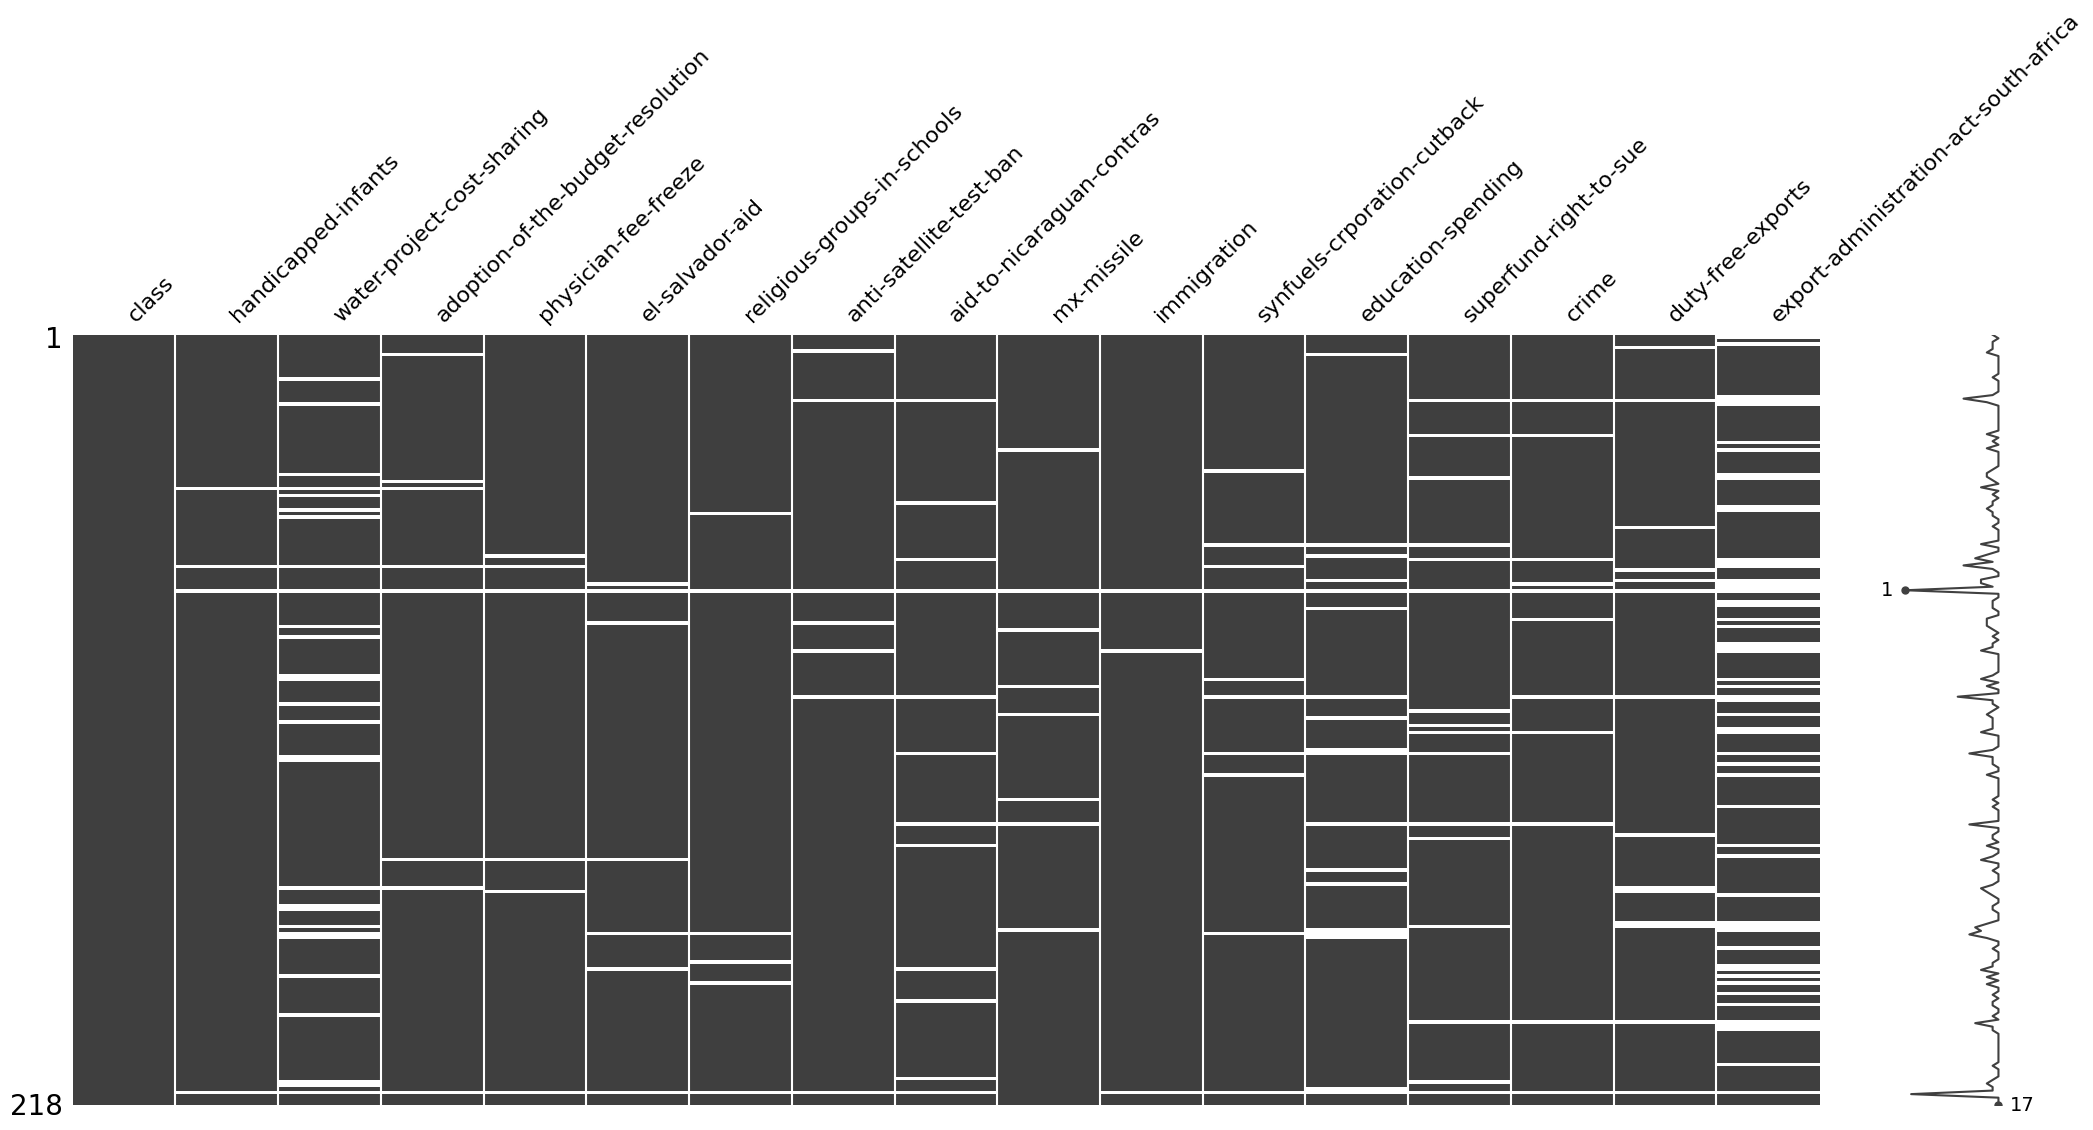

In [66]:
# Visualizing missing values
msno.matrix(training_set) 

In [67]:
training_set.isnull().sum()

class                                      0
handicapped-infants                        4
water-project-cost-sharing                28
adoption-of-the-budget-resolution          8
physician-fee-freeze                       6
el-salvador-aid                            7
religious-groups-in-schools                6
anti-satellite-test-ban                    7
aid-to-nicaraguan-contras                 12
mx-missile                                 8
immigration                                3
synfuels-crporation-cutback               10
education-spending                        18
superfund-right-to-sue                    16
crime                                     11
duty-free-exports                         14
export-administration-act-south-africa    54
dtype: int64

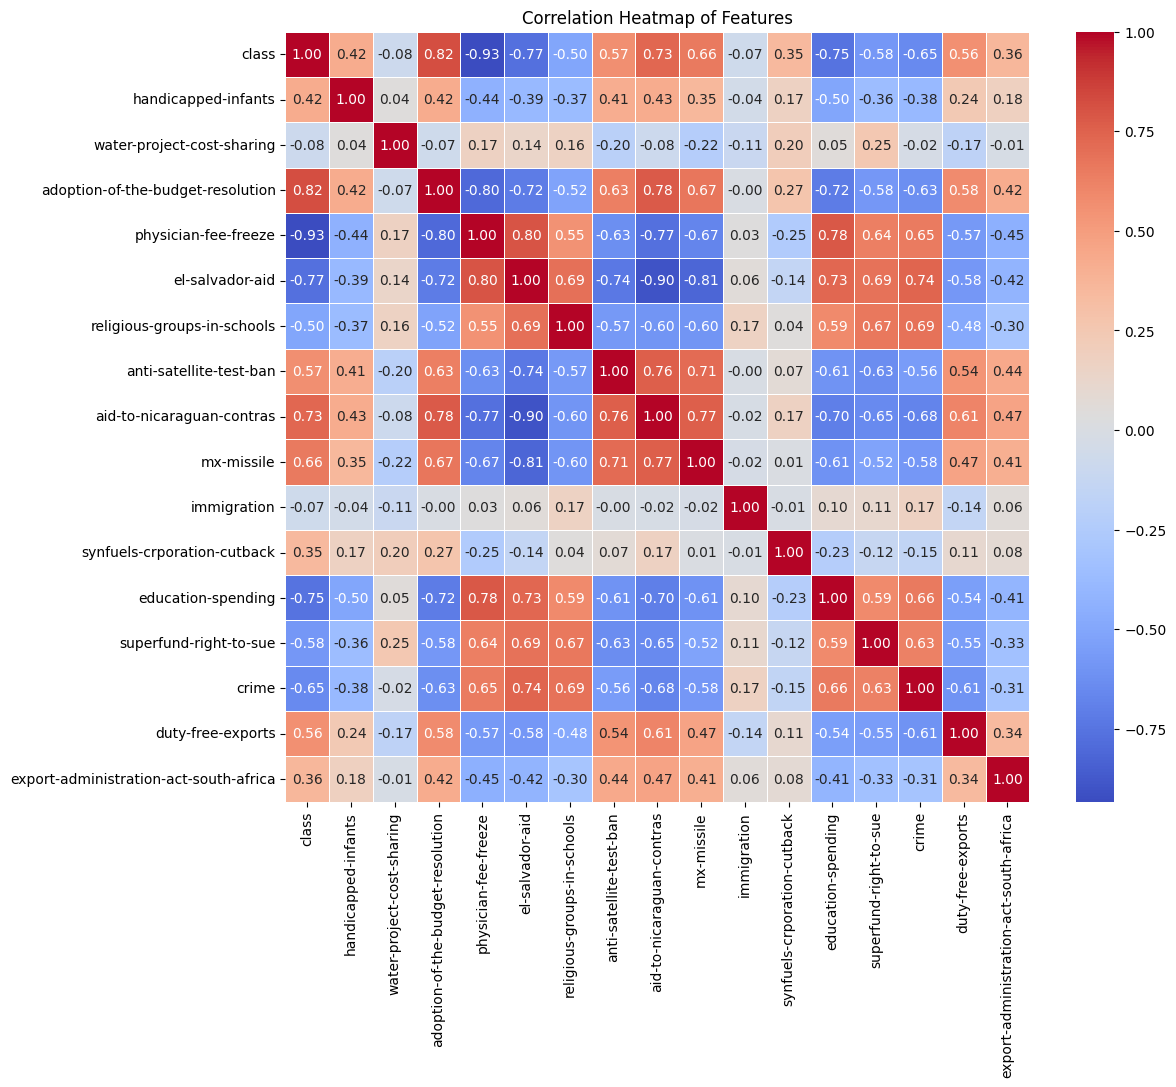

In [68]:
correlation_matrix = training_set.corr(numeric_only=True) # Use numeric_only to avoid potential issues with non-numeric columns

# Create the heatmap
plt.figure(figsize=(12, 10)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import torch

def congressional_voting_preprocessed(training_set):
    # Load data
    #training_set = pd.read_csv("data/CongressionalVotingID.shuf.lrn.csv")
    
    # Preprocessing
    training_set = training_set.drop(['ID'], axis=1)
    training_set.replace({'y': 1, 'n': 0, 'unknown': np.nan}, inplace=True)
    training_set['class'] = training_set['class'].map({'democrat': 1, 'republican': 0})
    
    # Split features and target
    X = training_set.drop(['class'], axis=1)
    y = training_set['class']
    
    # Convert to numpy arrays
    X = X.values
    y = y.values
    
    # Train-val split
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # MICE Imputation
    mice_imputer = IterativeImputer(
        estimator=BayesianRidge(),
        initial_strategy='most_frequent',
        max_iter=10,
        random_state=42,
        sample_posterior=True
    )
    
    X_train_mice = mice_imputer.fit_transform(X_train)
    X_val_mice = mice_imputer.transform(X_val)
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_mice)
    X_val_tensor = torch.FloatTensor(X_val_mice)
    y_train_tensor = torch.from_numpy(y_train).long() 
    y_val_tensor = torch.from_numpy(y_val).long()
    
    # Sanity checks
    print("NaN in X_train:", torch.isnan(X_train_tensor).any())
    print("NaN in y_train:", torch.isnan(y_train_tensor).any())
    
    return X_train_tensor, X_val_tensor, y_train_tensor, y_val_tensor

# Optional: If you want to run some diagnostics when this file is run directly
if __name__ == "__main__":
    # Load dataset here
    training_set = pd.read_csv("data/CongressionalVotingID.shuf.lrn.csv")
    
    # Run preprocessing
    X_train, X_val, y_train, y_val = congressional_voting_preprocessed(training_set)
    
    print("Shapes:")
    print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
    
    

C:\Users\chjul\AppData\Local\Temp\ipykernel_4400\727860789.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_set.replace({'y': 1, 'n': 0, 'unknown': np.nan}, inplace=True)


NaN in X_train: tensor(False)
NaN in y_train: tensor(False)
Shapes:
X_train: torch.Size([174, 16]), y_train: torch.Size([174])
X_val: torch.Size([44, 16]), y_val: torch.Size([44])
